# Quantitative maps from neighbor statistics
This notebook illustrates how to generate quantitative maps based on neighbor statistics using image processing libraries.

In [1]:
import pyclesperanto_prototype as cle
import numpy as np
from numpy import random
from skimage.io import imread
import matplotlib

The example image "maize_clsm.tif" was taken from the repository [mathematical_morphology_with_MorphoLibJ](https://github.com/dlegland/mathematical_morphology_with_MorphoLibJ) and is licensed by David Legland under [CC-BY 4.0 license](https://github.com/dlegland/mathematical_morphology_with_MorphoLibJ/blob/master/LICENSE).

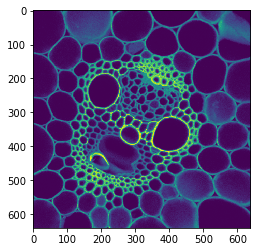

In [2]:
intensity_image = imread('../../data/maize_clsm.tif')
cle.imshow(intensity_image)

# Starting point: Label map
First, we perform a segmentation process to obtain a labeled map of the cells using thresholding and Voronoi labeling.

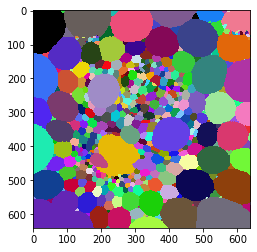

In [3]:
binary = cle.binary_not(cle.threshold_otsu(intensity_image))
cells = cle.voronoi_labeling(binary)

cle.imshow(cells, labels=True)

## Nearest neighbor distance maps
We then compute maps of the average distance to the nearest neighbors for each labeled cell.

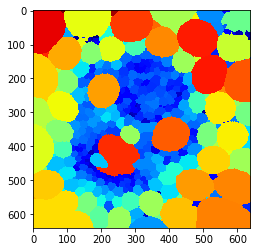

In [4]:
average_distance_of_n_closest_neighbors_map = cle.average_distance_of_n_closest_neighbors_map(cells, n=1)
cle.imshow(average_distance_of_n_closest_neighbors_map, color_map='jet')

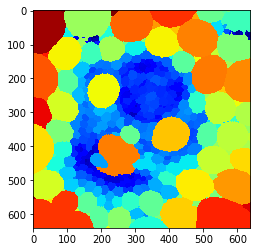

In [5]:
average_distance_of_n_closest_neighbors_map = cle.average_distance_of_n_closest_neighbors_map(cells, n=5)
cle.imshow(average_distance_of_n_closest_neighbors_map, color_map='jet')

## Touching neighbor distance map
Finally, we create a map that shows the average distance to touching neighbors for each cell.

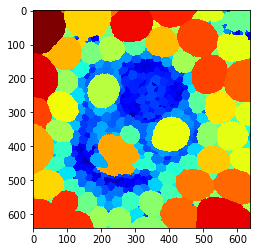

In [6]:
average_neighbor_distance_map = cle.average_neighbor_distance_map(cells)
cle.imshow(average_neighbor_distance_map, color_map='jet')